In [1]:
import sys
sys.path.append('../SF_history')
import sf_history
sys.path.append('../stats')
import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pickle

%matplotlib inline

/Library/Python/2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
lmc_sfh = sf_history.load_lmc_sfh()
lmc_coor = sf_history.load_lmc_coor()
smc_sfh = sf_history.load_smc_sfh()
smc_coor = sf_history.load_smc_coor()

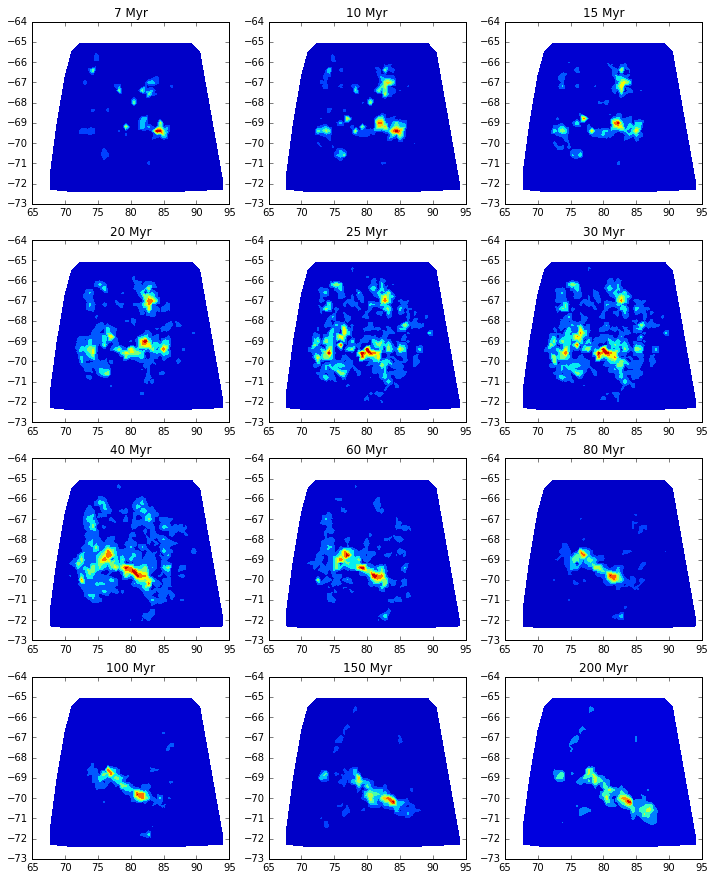

In [3]:
sf_history.test_LMC_SFH_plots()

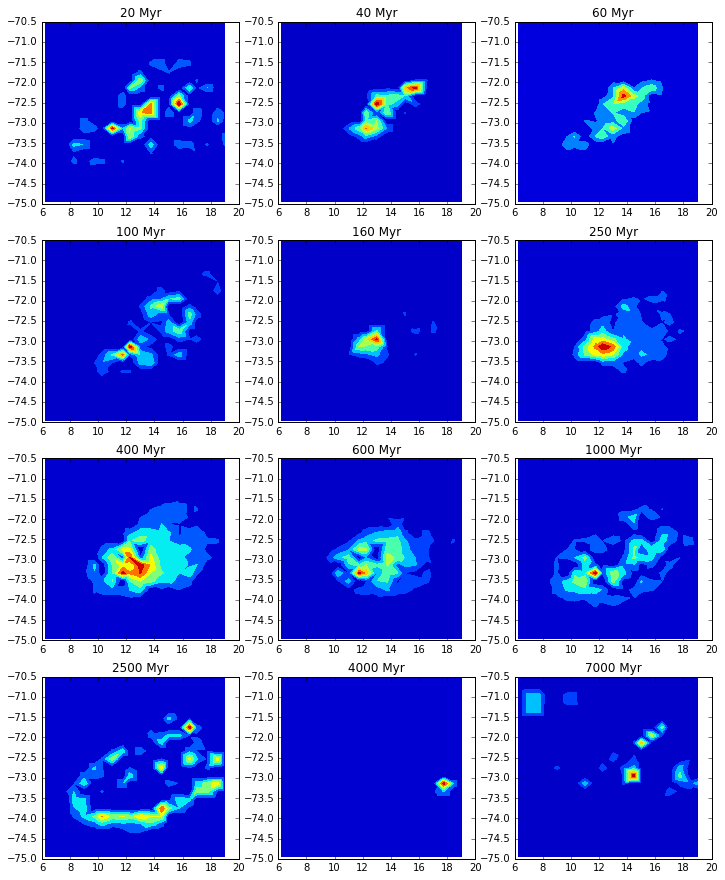

In [4]:
sf_history.test_SMC_SFH_plots()

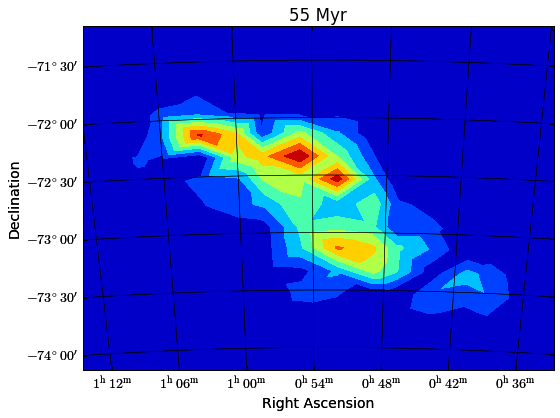

In [2]:
plt.rc('font', size=14)

sf_history.get_SMC_plot_polar(25.0)
plt.tight_layout()
plt.savefig('../figures/SMC_SF_25Myr.pdf')

sf_history.get_SMC_plot_polar(35.0)
plt.tight_layout()
plt.savefig('../figures/SMC_SF_35Myr.pdf')

sf_history.get_SMC_plot_polar(45.0)
plt.tight_layout()
plt.savefig('../figures/SMC_SF_45Myr.pdf')

sf_history.get_SMC_plot_polar(55.0)
plt.tight_layout()
plt.savefig('../figures/SMC_SF_55Myr.pdf')



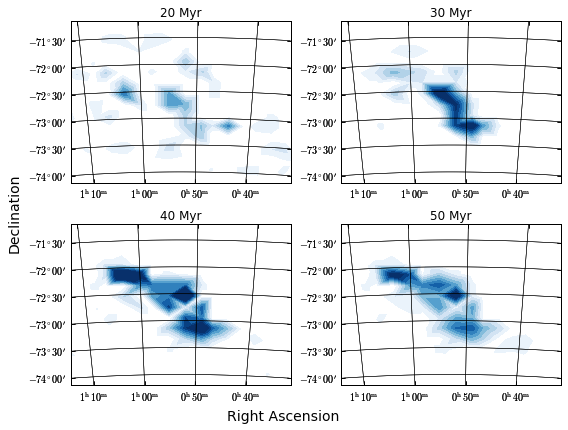

In [6]:
fig, ax = plt.subplots(2,2, figsize=(8,6))
plt.rc('font', size=10)

# Remove original x,y ticks
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])

ax[1,0].set_xticks([])
ax[1,0].set_yticks([])

ax[0,1].set_xticks([])
ax[0,1].set_yticks([])

ax[1,1].set_xticks([])
ax[1,1].set_yticks([])

# SF history plots
sf_history.get_SMC_plot_polar(20.0, fig_in=fig, rect=221, xlabel=None, ylabel=None, xgrid_density=5, ygrid_density=5)
sf_history.get_SMC_plot_polar(30.0, fig_in=fig, rect=222, xlabel=None, ylabel=None, xgrid_density=5, ygrid_density=5)
sf_history.get_SMC_plot_polar(40.0, fig_in=fig, rect=223, xlabel=None, ylabel=None, xgrid_density=5, ygrid_density=5)
sf_history.get_SMC_plot_polar(50.0, fig_in=fig, rect=224, xlabel=None, ylabel=None, xgrid_density=5, ygrid_density=5)

# Axes labels
fig.text(0.5, 0.02, 'Right Ascension', ha='center', fontsize=14)
fig.text(0.02, 0.5, 'Declination', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.10, left=0.13)


#plt.savefig('../figures/SMC_SF_history.pdf')
plt.show()

In [9]:
def get_SMC_plot(age):
    sfr = np.array([])
    for i in np.arange(len(smc_coor)):
        sfr = np.append(sfr, sf_history.get_SFH(smc_coor["ra"][i], \
                        smc_coor["dec"][i], age, smc_coor, smc_sfh))

    plt.tricontourf(smc_coor["ra"], smc_coor["dec"], sfr)
    plt.title(str(int(age)) + ' Myr')

    return plt

def get_LMC_plot(age):
    sfr = np.array([])
    for i in np.arange(len(lmc_coor)):
        sfr = np.append(sfr, sf_history.get_SFH(lmc_coor["ra"][i], \
                        lmc_coor["dec"][i], age, lmc_coor, lmc_sfh))

    plt.tricontourf(lmc_coor["ra"], lmc_coor["dec"], sfr)
    plt.title(str(int(age)) + ' Myr')
    plt.ylim(-73, -64)

    return plt


[11.396916666666666, -73.31758888888889]


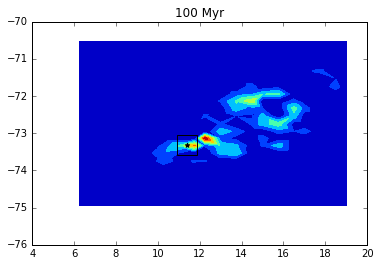

In [27]:
from astropy.coordinates import SkyCoord
from astropy import units as u

coor_J0045 = SkyCoord('00h45m35.26s', '-73d19m03.32s')
coor_J0045 = [coor_J0045.ra.degree, coor_J0045.dec.degree]


get_SMC_plot(100.0)

plt.scatter(coor_J0045[0], coor_J0045[1], marker="*", s=20, color='k')
plt.scatter(coor_J0045[0], coor_J0045[1], marker="s", s=400, color='k', facecolors='none')

plt.show()

In [3]:
sampler = pickle.load( open( "../data/SMC_MCMC_sampler.obj", "rb" ) )

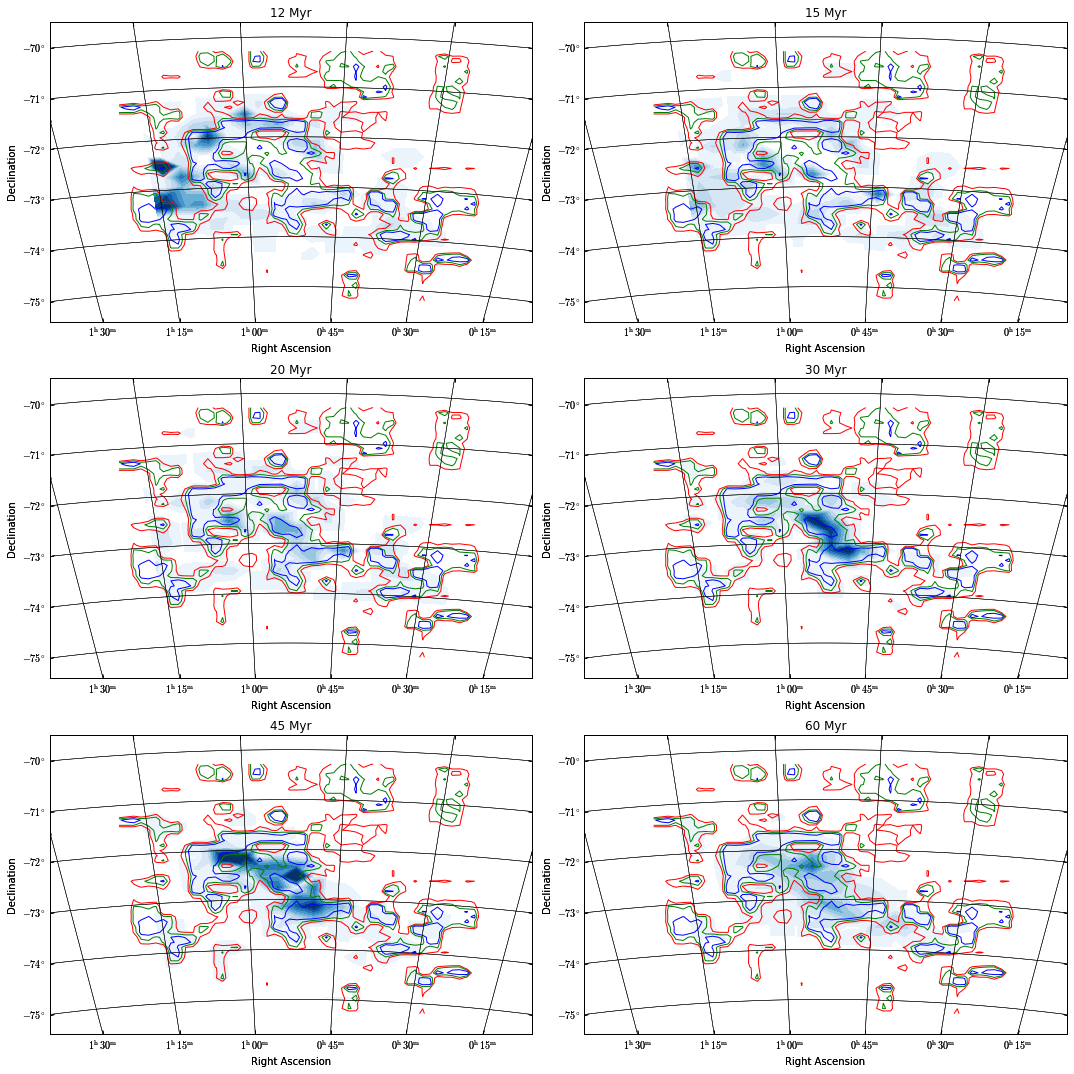

In [4]:
# TEST PLOT

fig, ax = plt.subplots(3,2, figsize=(15,15))

for i in [0,1]:
    for j in [0,1,2]:
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])

sf_history.get_SMC_plot_polar(12.0, ra_dist=sampler.flatchain.T[7], dec_dist=sampler.flatchain.T[8], xwidth=3.0, ywidth=3.0, fig_in=fig, rect=321)
sf_history.get_SMC_plot_polar(15.0, ra_dist=sampler.flatchain.T[7], dec_dist=sampler.flatchain.T[8], xwidth=3.0, ywidth=3.0, fig_in=fig, rect=322)
sf_history.get_SMC_plot_polar(20.0, ra_dist=sampler.flatchain.T[7], dec_dist=sampler.flatchain.T[8], xwidth=3.0, ywidth=3.0, fig_in=fig, rect=323)
sf_history.get_SMC_plot_polar(30.0, ra_dist=sampler.flatchain.T[7], dec_dist=sampler.flatchain.T[8], xwidth=3.0, ywidth=3.0, fig_in=fig, rect=324)
sf_history.get_SMC_plot_polar(45.0, ra_dist=sampler.flatchain.T[7], dec_dist=sampler.flatchain.T[8], xwidth=3.0, ywidth=3.0, fig_in=fig, rect=325)
sf_history.get_SMC_plot_polar(60.0, ra_dist=sampler.flatchain.T[7], dec_dist=sampler.flatchain.T[8], xwidth=3.0, ywidth=3.0, fig_in=fig, rect=326)

plt.tight_layout()
plt.show()

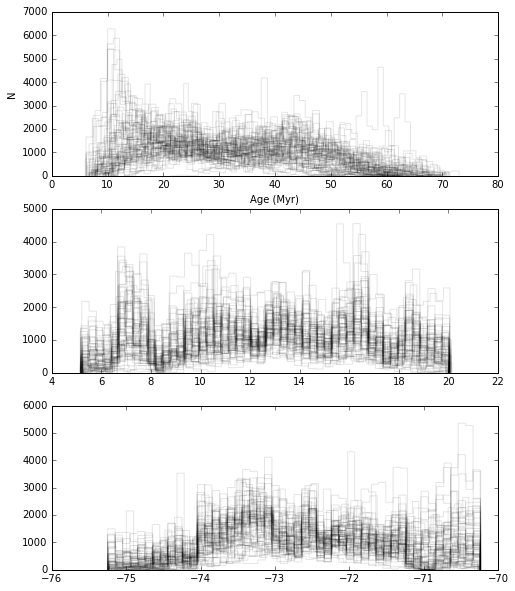

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(8,10))

for i in np.arange(80):
    time1 = sampler.chain[i,:,9].flatten()
    ax[0].hist(time1, histtype='step', color='k', bins=50, alpha=0.1)

for i in np.arange(80):
    ra1 = sampler.chain[i,:,7].flatten()
    ax[1].hist(ra1, histtype='step', color='k', bins=50, alpha=0.1)

for i in np.arange(80):
    dec1 = sampler.chain[i,:,8].flatten()
    ax[2].hist(dec1, histtype='step', color='k', bins=50, alpha=0.1)


    
    
ax[0].set_xlabel('Age (Myr)')
ax[0].set_ylabel('N')

plt.show()

In [21]:
from functools import reduce
import corner
#corner.hist2d(sampler.flatchain.T[7], sampler.flatchain.T[8])

#ids = np.intersect1d(np.where(sampler.flatchain.T[7]>18.0), np.where(sampler.flatchain.T[8]<-73.0))
ids = reduce(np.intersect1d, (np.where(sampler.flatchain.T[7]>18.5),  \
                              np.where(sampler.flatchain.T[7]<19.1),  \
                              np.where(sampler.flatchain.T[8]<-73.1), \
                              np.where(sampler.flatchain.T[8]>-73.6)  \
                             ))

ids = np.intersect1d(np.where(sampler.flatchain.T[9]>1.5), np.where(sampler.flatchain.T[9]<15.5))
ids = np.where(sampler.flatchain.T[8]>-71.0)

ra_sec1 = sampler.flatchain.T[7][ids]
dec_sec1 = sampler.flatchain.T[8][ids]
t_sec1 = sampler.flatchain.T[9][ids]


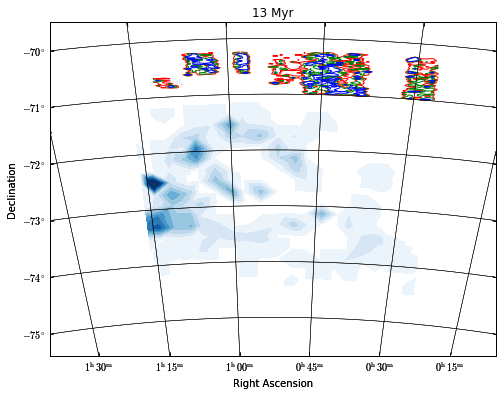

In [56]:

sf_history.get_SMC_plot_polar(13.0, ra_dist=ra_sec1, dec_dist=dec_sec1, xwidth=3.0, ywidth=3.0)
plt.show()

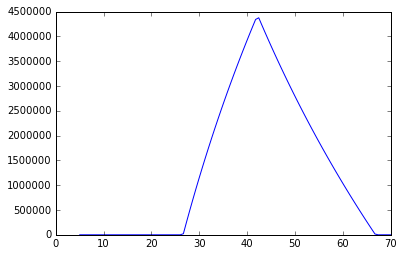

In [21]:
# plt.hist(sampler.flatchain.T[9], histtype='step', color='b', bins=80, range=(0,80))
# plt.hist(t_sec1, histtype='step', color='k', bins=80, range=(0,80))

times = np.linspace(5.0, 70.0, 100)
sfr = sf_history.get_SFH(11.0, -70.5, times, smc_coor, smc_sfh)
plt.plot(times, sfr)

plt.show()

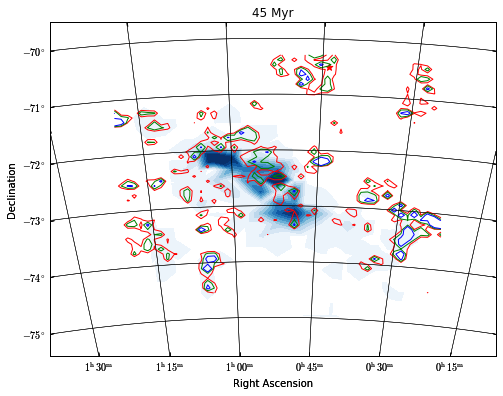

In [25]:



i = 4
step_low, step_high = 0, 50000

ra1 = sampler.chain[i,step_low:step_high,7].flatten()
dec1 = sampler.chain[i,step_low:step_high,8].flatten()
time1 = sampler.chain[i,step_low:step_high,9].flatten()
lnprob1 = sampler.lnprobability[i,step_low:step_high].flatten()

sfh1 = sf_history.get_SFH(ra1, dec1, time1, sf_history.smc_coor, sf_history.smc_sfh)


# ids = np.where(dec1>-71.0)
# ra1_sec1 = ra1[ids]
# dec1_sec1 = dec1[ids]
# time1_sec1 = time1[ids]
# lnprob1_sec1 = lnprob1[ids]

#corner.corner(np.array([ra1, dec1, time1, lnprob1]).T, bins=20)
#plt.scatter(ra1, lnprob1, marker='.')
plt.show()


sf_history.get_SMC_plot_polar(45.0, ra_dist=ra1, dec_dist=dec1, xwidth=3.0, ywidth=3.0, ra=11.0, dec=-70.5)
plt.show()

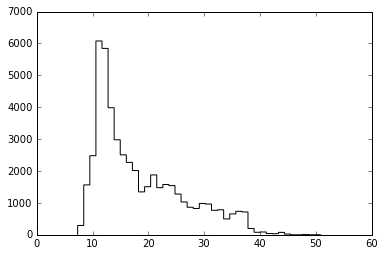

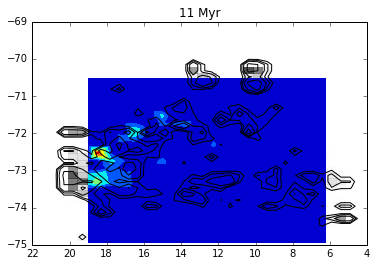

In [35]:
i = 0
step_low, step_high = 0, 50000


def get_SMC_plot(age):
    sfr = np.array([])
    for i in np.arange(len(smc_coor)):
        sfr = np.append(sfr, sf_history.get_SFH(smc_coor["ra"][i], smc_coor["dec"][i], age, sf_history.smc_coor, sf_history.smc_sfh))

    plt.tricontourf(sf_history.smc_coor["ra"], sf_history.smc_coor["dec"], sfr)
    plt.title(str(int(age)) + ' Myr')

    return plt

ra1 = sampler.chain[i,step_low:step_high,7].flatten()
dec1 = sampler.chain[i,step_low:step_high,8].flatten()
time1 = sampler.chain[i,step_low:step_high,9].flatten()
lnprob1 = sampler.lnprobability[i,step_low:step_high].flatten()

plt.hist(time1, histtype='step', color='k', bins=40)
plt.show()

sfh1 = sf_history.get_SFH(ra1, dec1, time1, sf_history.smc_coor, sf_history.smc_sfh)
weights = 1.0/sfh1

corner.hist2d(ra1, dec1, plot_datapoints=False, fill_contours=False, bins=30)

get_SMC_plot(11.0)

plt.xlim(22.0, 4.0)
plt.ylim(-75., -69.)

plt.show()

In [ ]:
ra1 = sampler.flatchain.T[7][0:100]
dec1 = sampler.flatchain.T[8][0:100]
time1 = sampler.flatchain.T[9][0:100]
lnprob1 = sampler.lnprobability[0:100]

SFR1 = sf_history.get_SFH(ra1, dec1, time1, sf_history.smc_coor, sf_history.smc_sfh)
print len(SFR1), len(lnprob1) 

ValueError: x and y must be the same size

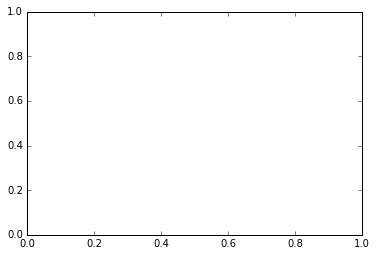

In [32]:
plt.scatter(SFR1[0:100], lnprob1[0:100])

plt.show()